In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ----- make nice figures -----
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
from cycler import cycler
COLORS = ['#F00D2C', '#242482', '#0071BE', '#4E8F00', '#553C67', '#DA5319']
default_cycler = cycler(color=COLORS)
plt.rc('axes', prop_cycle=default_cycler) 
# -----------------------------

# Bayesian Inference

Text(0.5, 1.0, 'Prior distribution on Theta')

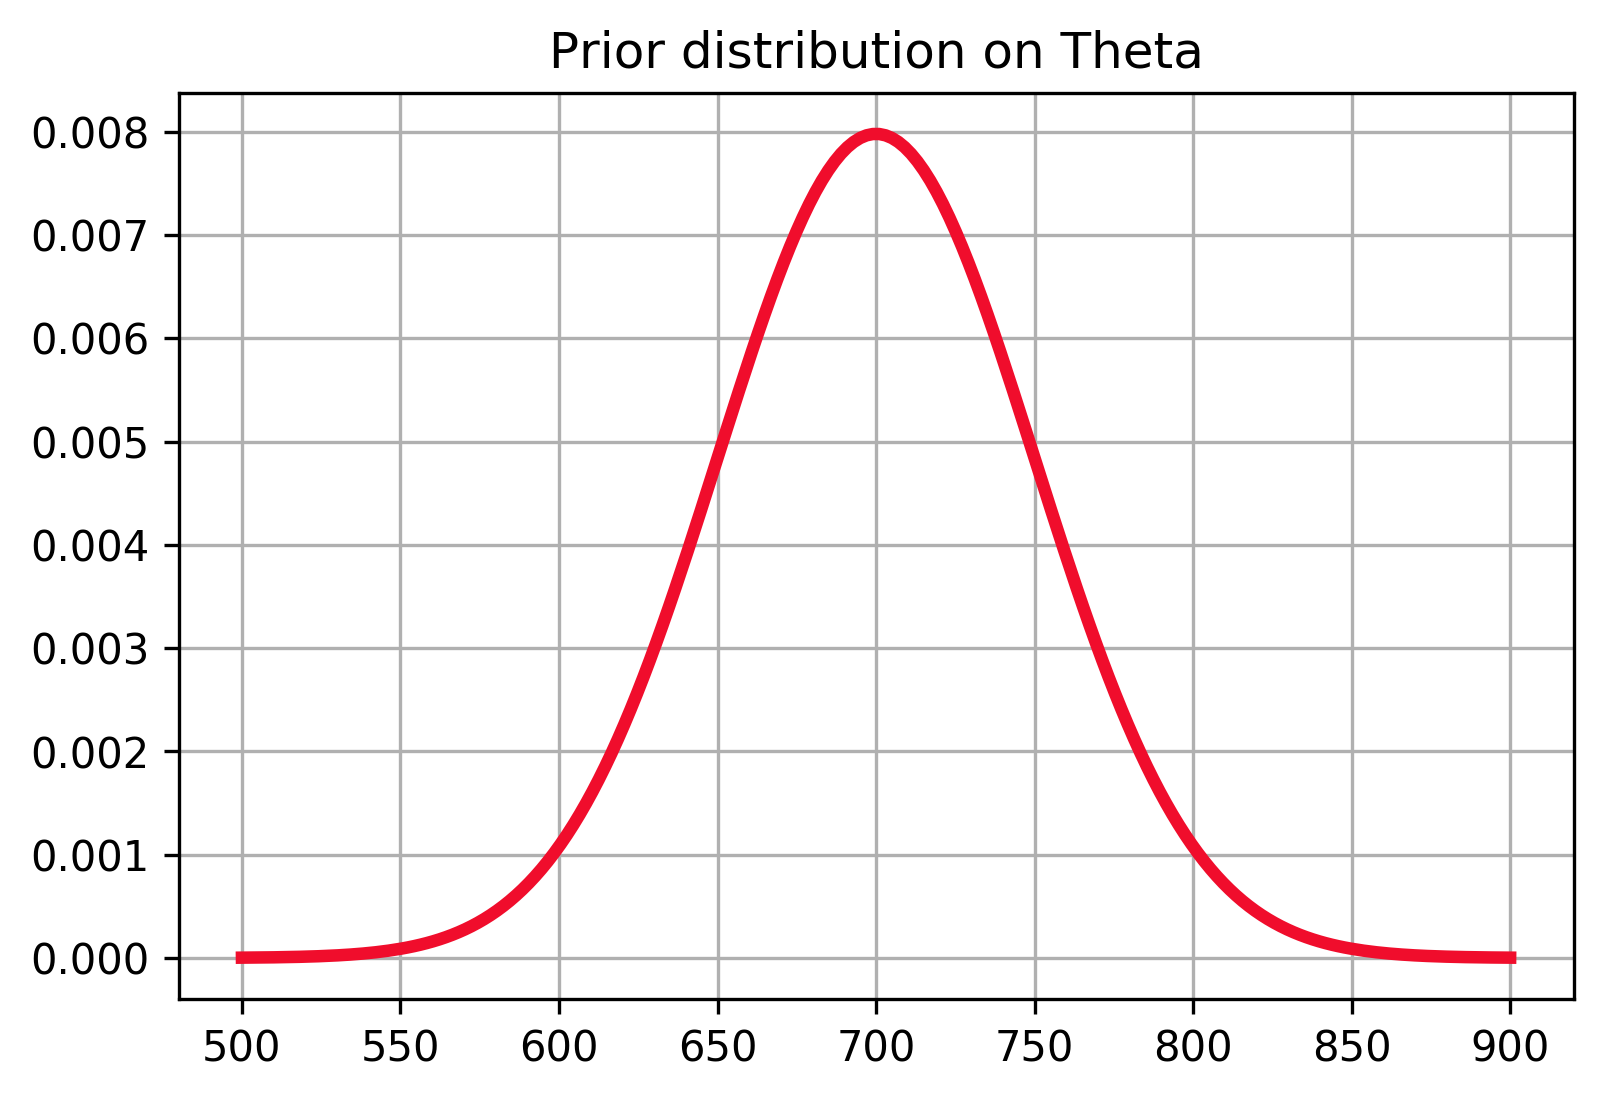

In [32]:
from scipy.stats import norm

mu_theta = 700
sigma_theta = 50

# Calculate pdf values for prior distribution
theta = np.linspace(500, 900, 200)
f_prior = norm.pdf(theta, loc = mu_theta, scale = sigma_theta)

# Plot prior pdf
plt.plot(theta, f_prior, linewidth=3)
plt.grid()
plt.title('Prior distribution on Theta')

In [23]:
# Load data
data_file_name = "data/JAHANMI2.txt"
data = np.loadtxt(data_file_name, skiprows=1)

# Extract strength column
X = data[:, 4]

Text(0.5, 1.0, 'Unnormalized Posterior Distribution on Theta')

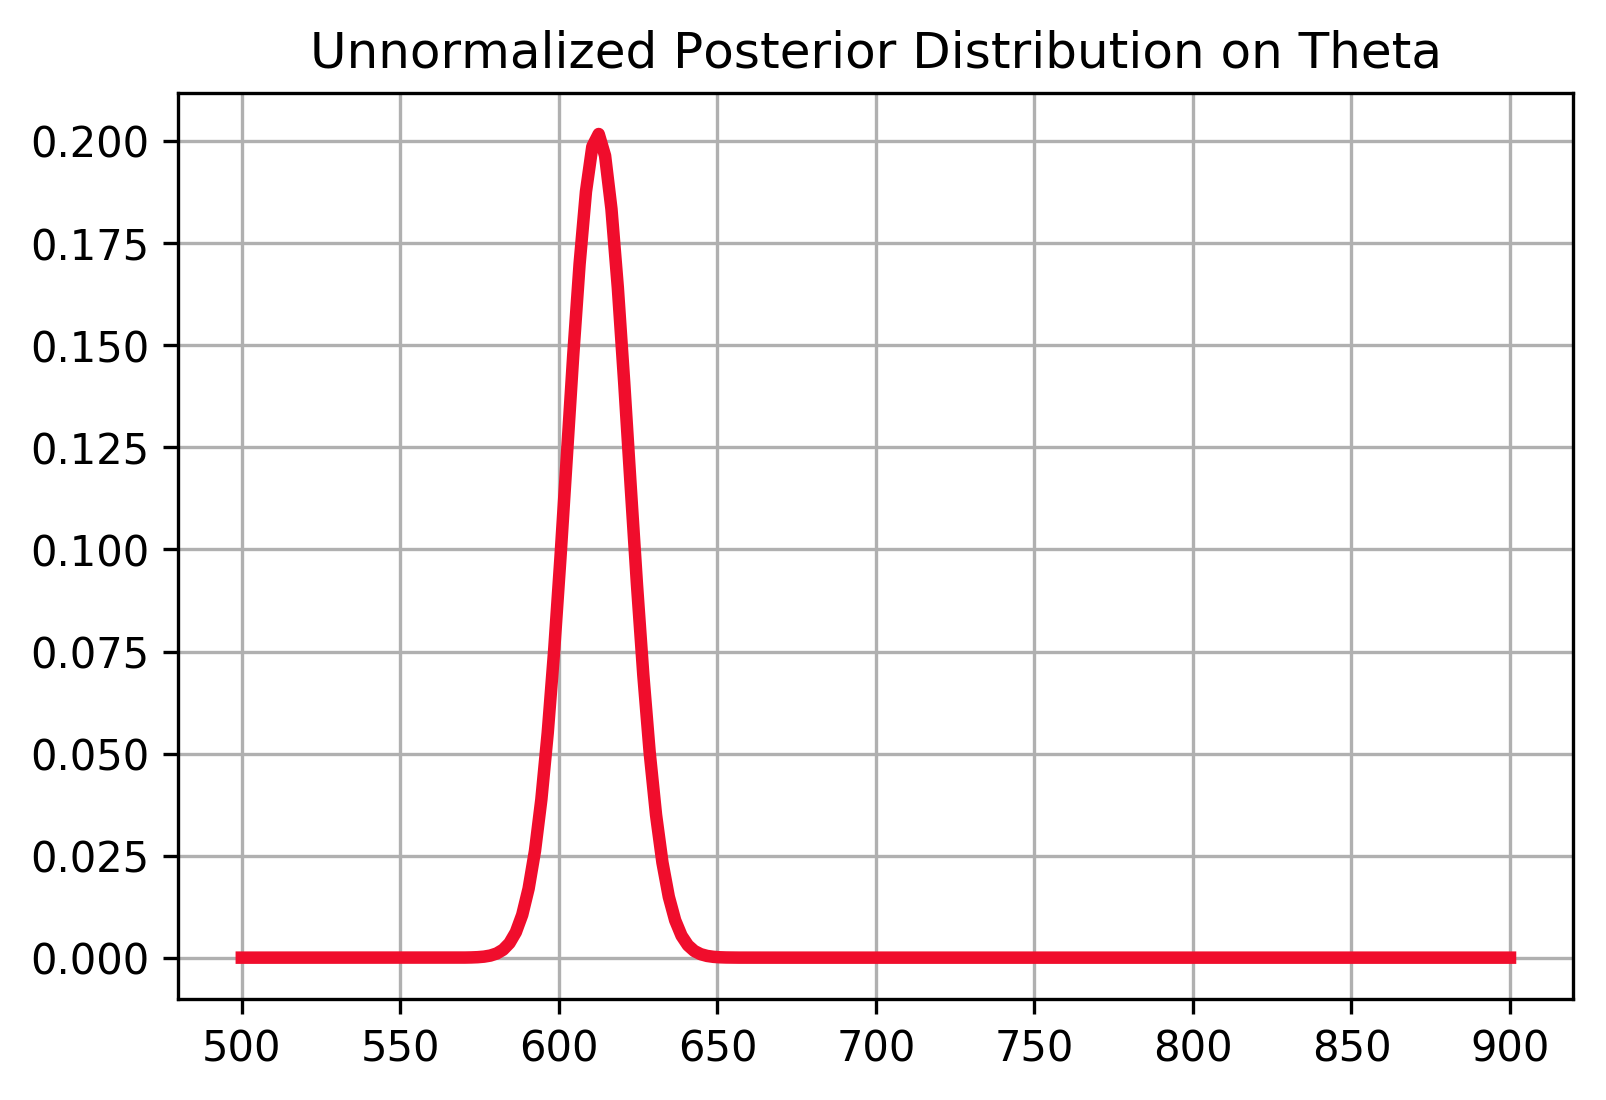

In [24]:
# First observation:
x_obs = X[0]

# We'll calculate the unnormalized posterior (without normalization factors)
f_posterior = np.exp( -(x_obs - theta)**2/(2*10**2) ) * np.exp(-(theta-700)**2/(2*50**2))

plt.plot(theta, f_posterior, linewidth=3)
plt.grid()
plt.title('Unnormalized Posterior Distribution on Theta')

## Bayesian Update for Normal-Normal Model


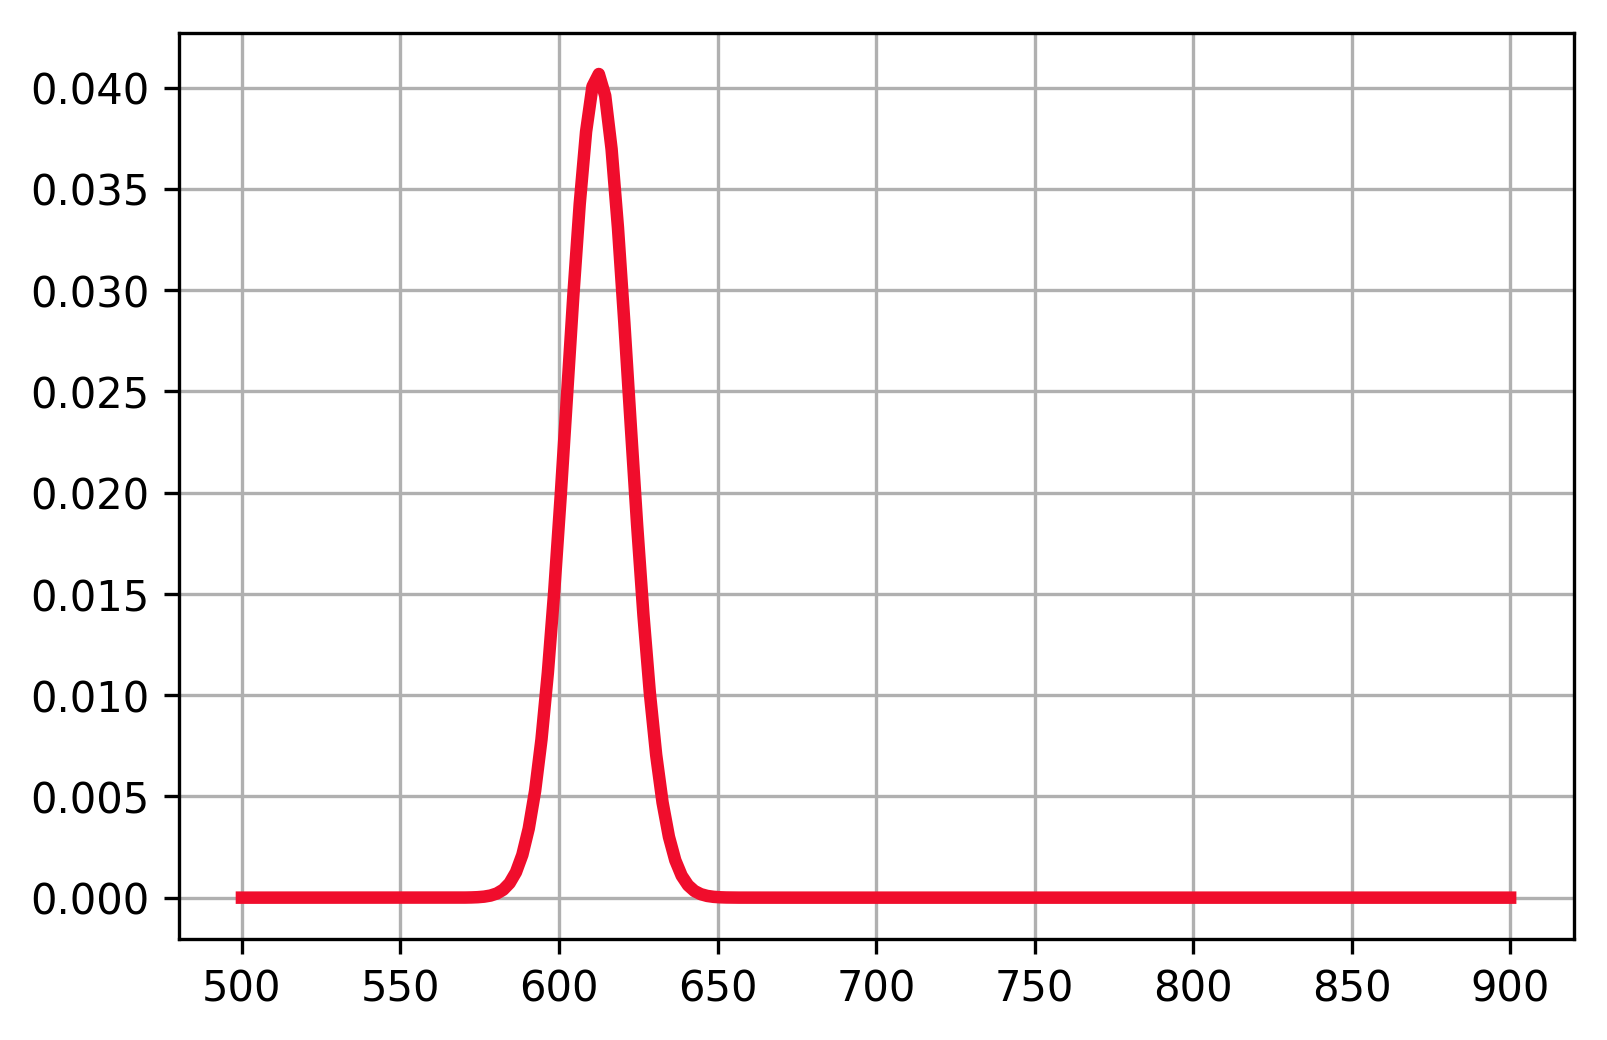

In [31]:
sig = 10
a = 700
b = 50

# This is the closed form solution for the bayesian update for the Normal-Normal model
a_posterior = (sig**2*a + b**2*x_obs) / (sig**2 + b**2)
b_posterior = np.sqrt((sig**2*b**2) / (sig**2 + b**2))

y = norm.pdf(theta, loc = a_posterior, scale = b_posterior)
plt.plot(theta, y, linewidth=3)
plt.grid()

# Impact on uncertainties on posterior

## $\sigma^2_\Theta$ small, $\sigma^2_X$ small

In this case, we are very confident in our data measurement (if we were to get more data, the values wouldn't change much from what we know). We're also confident in our prior estimate of the mean of the data distribution. We'll assume a true data distribution of $X \sim \mathcal N(\Theta, 1^2)$ with unknown mean $\Theta$. 

We'll assume a prior distribution on this parameter $\Theta \sim \mathcal N(8, 1^2)$.

Text(0.5, 1.0, 'Prior Distribution on Θ')

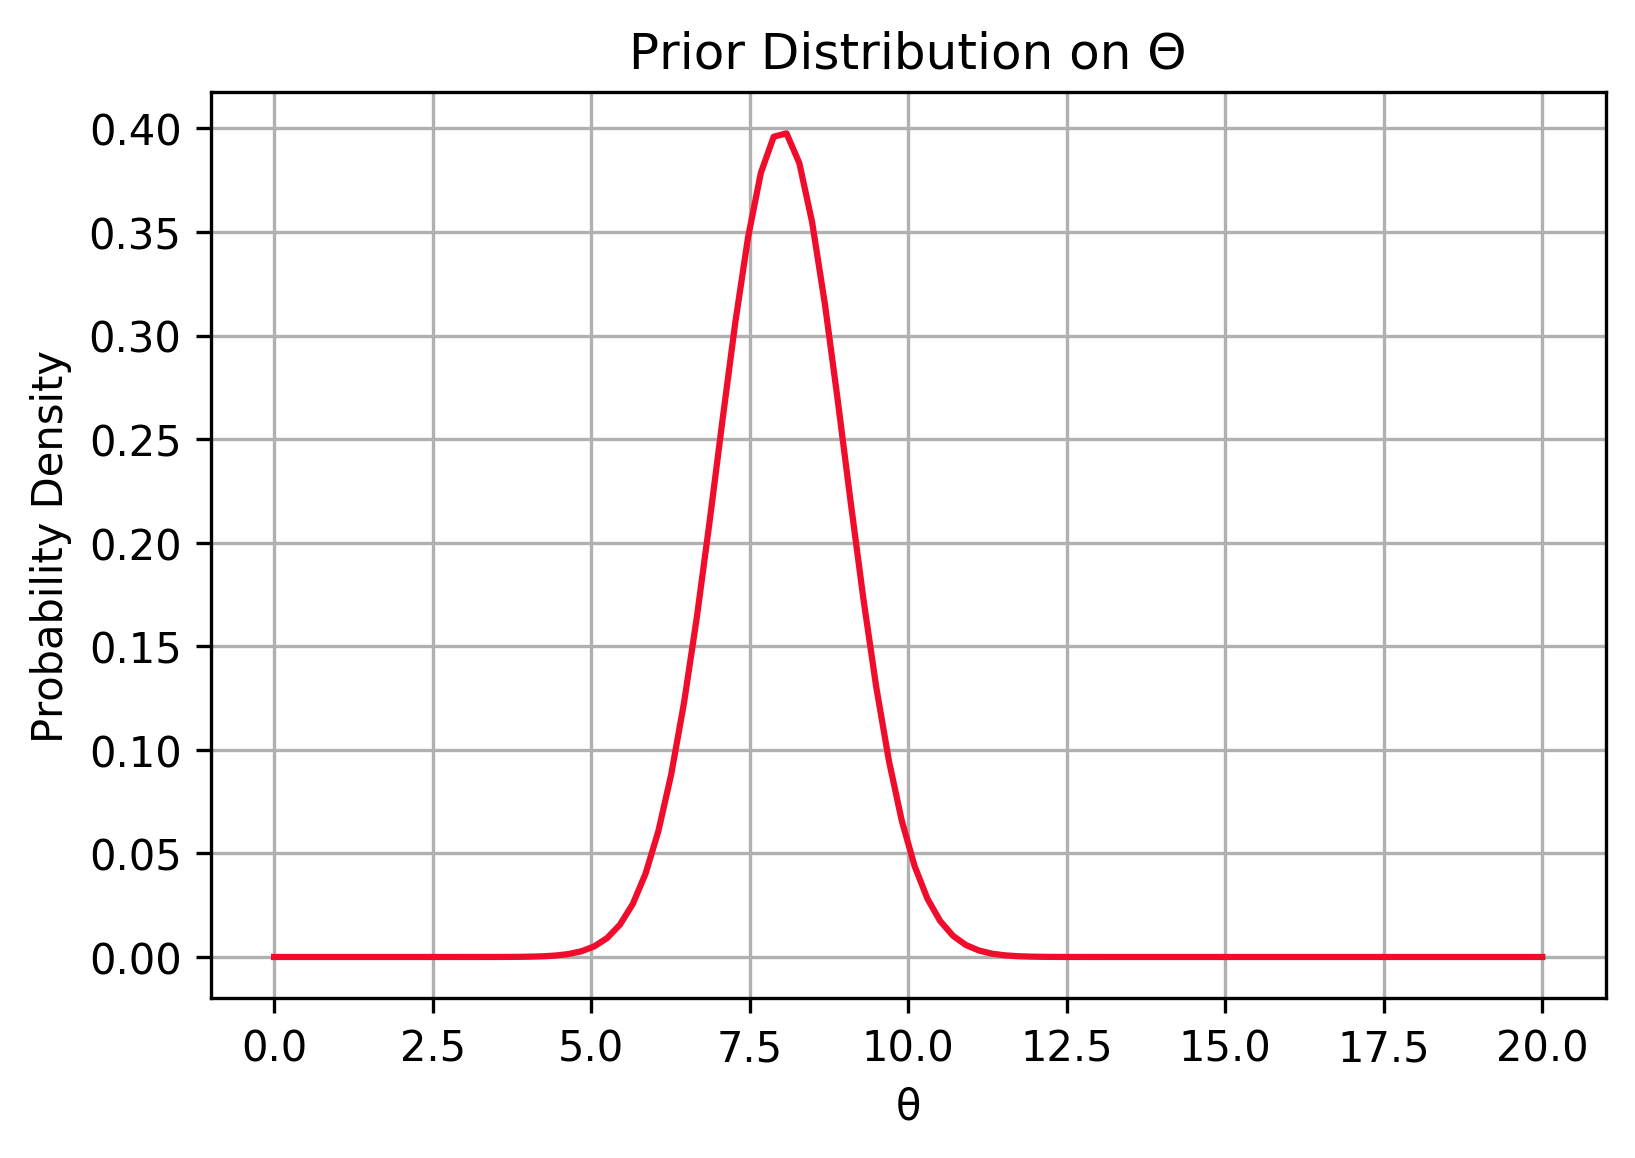

In [22]:
from scipy.stats import norm

sig_X = 1

# Our prior distribution on Theta
mu_Theta = 8
sig_Theta = 1

# Plot the prior distrion
theta = np.linspace(0, 20, 100)
pdf_vals = norm.pdf(theta, mu_Theta, sig_Theta)

plt.plot(theta, pdf_vals)
plt.grid()
plt.xlabel('θ')
plt.ylabel('Probability Density')
plt.title('Prior Distribution on Θ')

Now we observe x = 10. How does our posterior look like based on this new information? We can use the update formula for the Normal-Normal model.

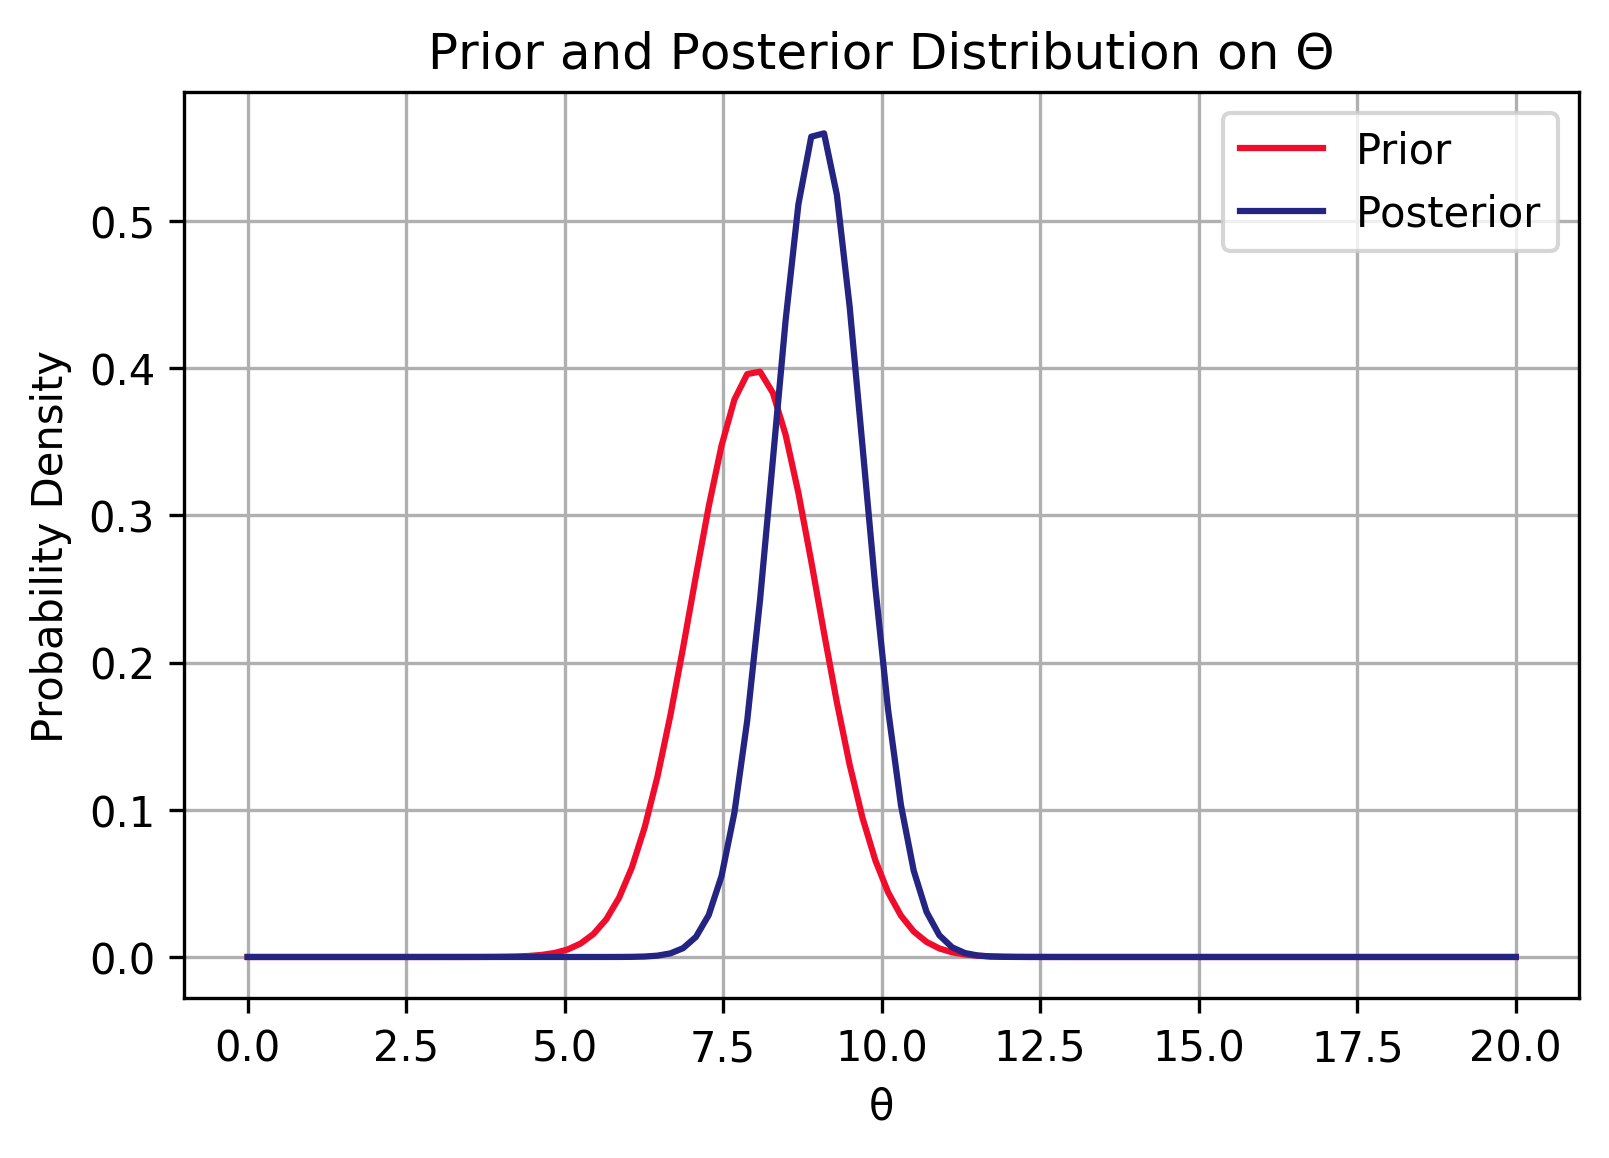

In [23]:
x_obs = 10

hat_mu_Theta = (sig_X**2*mu_Theta + sig_Theta**2*x_obs) / (sig_X**2 + sig_Theta**2)
hat_sig_Theta = np.sqrt((sig_X**2 * sig_Theta**2) / (sig_X**2 + sig_Theta**2))

# Now evaluate the normal pdf with these posterior parameter values
posterior_pdf_vals = norm.pdf(theta, hat_mu_Theta, hat_sig_Theta)
plt.plot(theta, pdf_vals)
plt.plot(theta, posterior_pdf_vals)
plt.grid()
plt.xlabel('θ')
plt.ylabel('Probability Density')
plt.title('Prior and Posterior Distribution on Θ')

plt.legend(['Prior', 'Posterior'])

The mean of this posterior is $\hat \mu_\Theta$:

In [25]:
print(hat_mu_Theta)

9.0


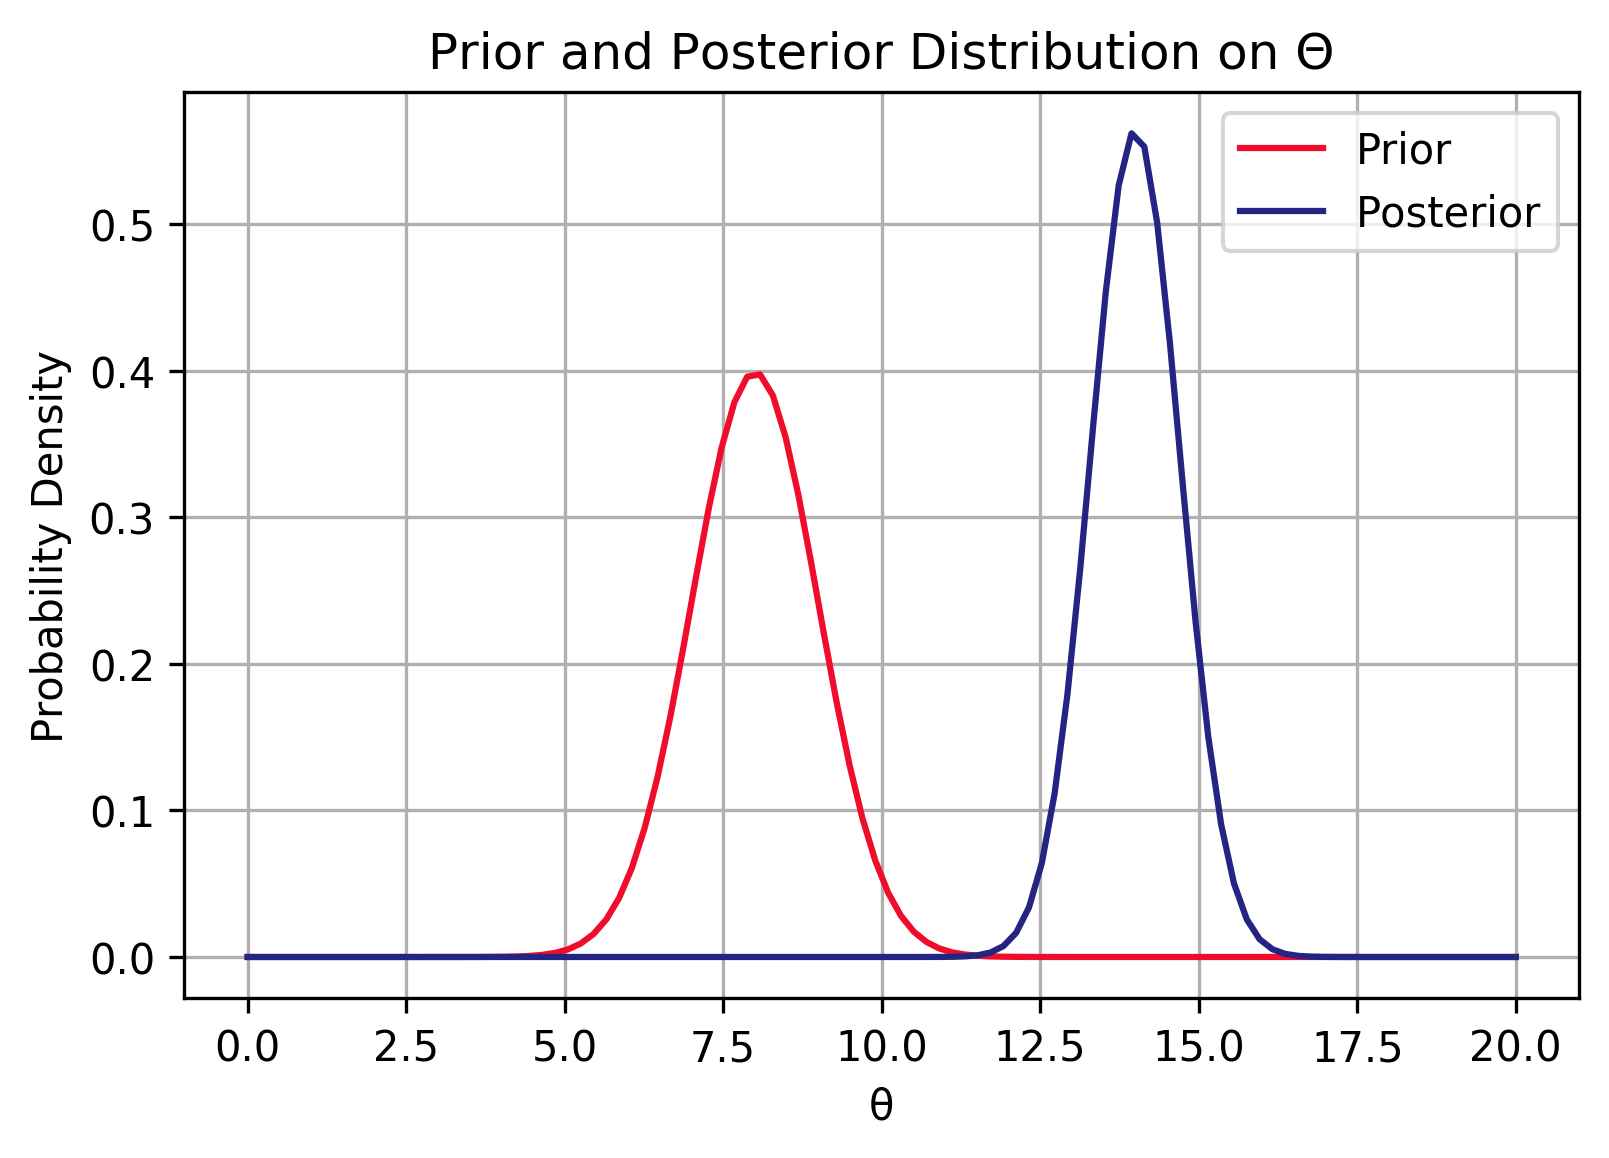

In [28]:
x_obs = 20

hat_mu_Theta = (sig_X**2*mu_Theta + sig_Theta**2*x_obs) / (sig_X**2 + sig_Theta**2)
hat_sig_Theta = np.sqrt((sig_X**2 * sig_Theta**2) / (sig_X**2 + sig_Theta**2))

# Now evaluate the normal pdf with these posterior parameter values
posterior_pdf_vals = norm.pdf(theta, hat_mu_Theta, hat_sig_Theta)
plt.plot(theta, pdf_vals)
plt.plot(theta, posterior_pdf_vals)
plt.grid()
plt.xlabel('θ')
plt.ylabel('Probability Density')
plt.title('Prior and Posterior Distribution on Θ')

plt.legend(['Prior', 'Posterior'])

The mean of this posterior is $\hat \mu_\Theta$:

In [27]:
print(hat_mu_Theta)

14.0


Recall that $\Theta$ here represents the mean of the data distribution. We initially thought the data had mean 8 ($\pm 1$), and we then observed data with value 20. The resulting updated estimate is 14, which is exactly between 8 and 20!

## $\sigma^2_\Theta$ small, $\sigma^2_X$ large

Let's do the same thing, but lets assume the data comes from a wider distribution. In other words, we have less "certainty" that any one observed value $X$ is close to the average value that before. Let's assume 

$$ X \sim \mathcal N(\Theta, 3^2) $$.

We'll still assume a prior distribution on $\Theta \sim \mathcal N(8, 1)$. Now what happens when we observe $x = 20$?

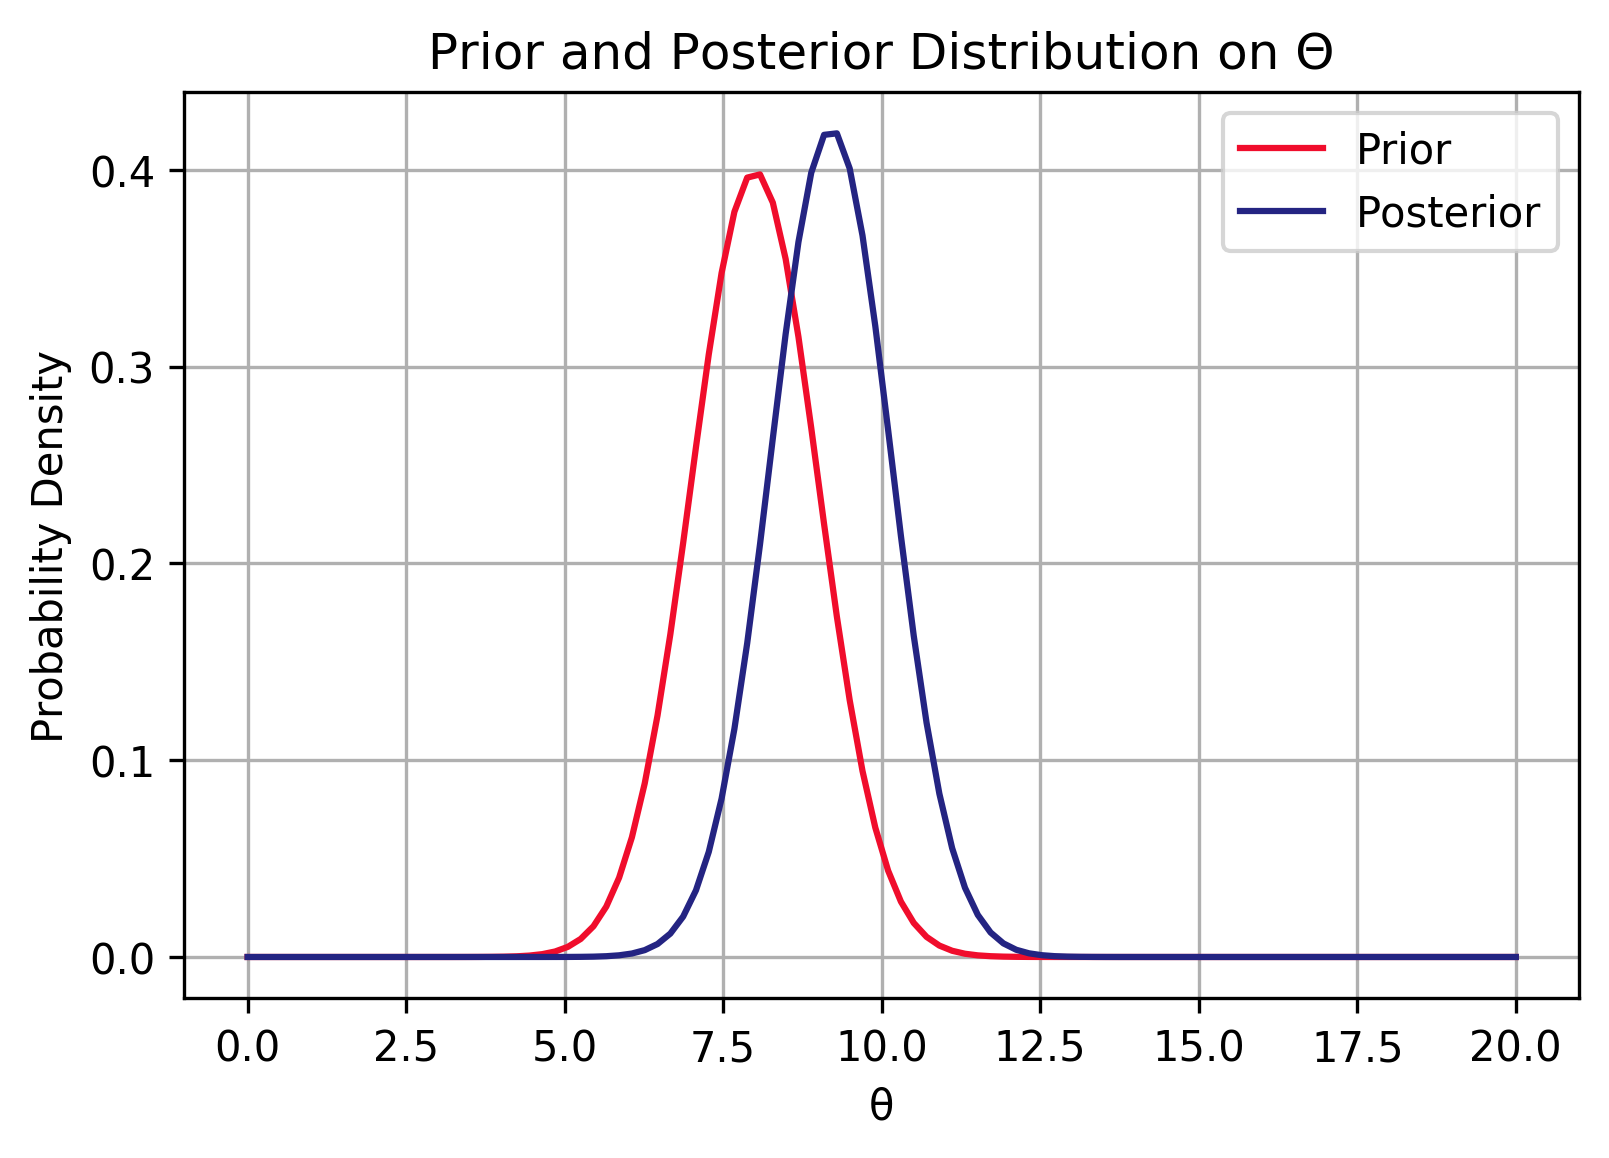

In [31]:
sig_X = 3

# Our prior distribution on Theta
mu_Theta = 8
sig_Theta = 1

x_obs = 20

hat_mu_Theta = (sig_X**2*mu_Theta + sig_Theta**2*x_obs) / (sig_X**2 + sig_Theta**2)
hat_sig_Theta = np.sqrt((sig_X**2 * sig_Theta**2) / (sig_X**2 + sig_Theta**2))

# Now evaluate the normal pdf with these posterior parameter values
pdf_vals = norm.pdf(theta, mu_Theta, sig_Theta)
posterior_pdf_vals = norm.pdf(theta, hat_mu_Theta, hat_sig_Theta)
plt.plot(theta, pdf_vals)
plt.plot(theta, posterior_pdf_vals)
plt.grid()
plt.xlabel('θ')
plt.ylabel('Probability Density')
plt.title('Prior and Posterior Distribution on Θ')

plt.legend(['Prior', 'Posterior'])

The mean of this posterior is $\hat \mu_\Theta$:

In [32]:
print(hat_mu_Theta)
print(mu_Theta)

9.2
8


We see that the posterior mean is still between the observed value and the prior mean, but it is much closer to the prior value.

## $\sigma^2_\Theta$ large, $\sigma^2_X$ small

In this case, we are not so confident in our initial estimate of the parameter $\Theta$, but we are confident in our data.

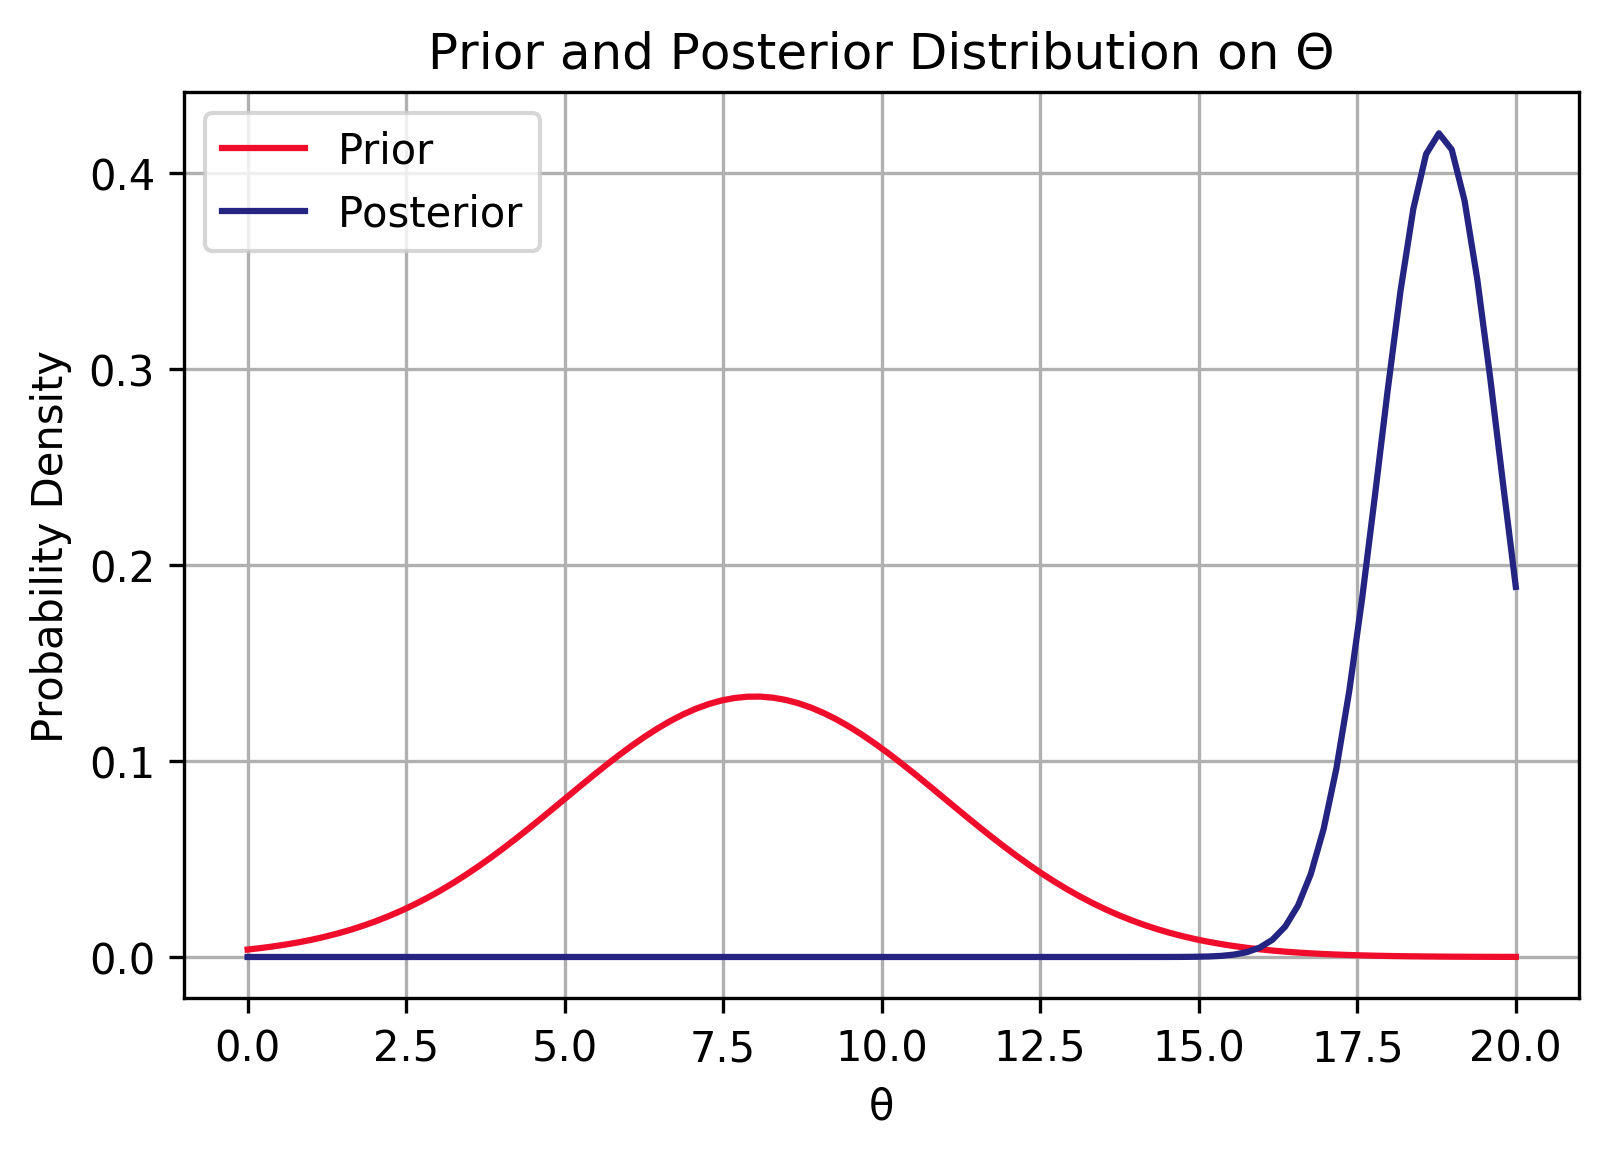

In [33]:
sig_X = 1

# Our prior distribution on Theta
mu_Theta = 8
sig_Theta = 3

x_obs = 20

hat_mu_Theta = (sig_X**2*mu_Theta + sig_Theta**2*x_obs) / (sig_X**2 + sig_Theta**2)
hat_sig_Theta = np.sqrt((sig_X**2 * sig_Theta**2) / (sig_X**2 + sig_Theta**2))

# Now evaluate the normal pdf with these posterior parameter values
pdf_vals = norm.pdf(theta, mu_Theta, sig_Theta)
posterior_pdf_vals = norm.pdf(theta, hat_mu_Theta, hat_sig_Theta)
plt.plot(theta, pdf_vals)
plt.plot(theta, posterior_pdf_vals)
plt.grid()
plt.xlabel('θ')
plt.ylabel('Probability Density')
plt.title('Prior and Posterior Distribution on Θ')

plt.legend(['Prior', 'Posterior'])

In [34]:
print(hat_mu_Theta)
print(mu_Theta)

18.8
8


As expected, the posterior estimate of the average data valuer is much closer to the observed value.